## Here's a chart of $AAPL from 2020 to 2022.
Using the Yahoo Finance API along with `matplotlib` and `pandas`, we can create a pretty great daily chart of $AAPL's closing price. 

*Well, what's that orange line mean?* It's the **20SMA!** It seems to correlate pretty well with $AAPL's price, right? The SMA, or Simple Moving Average, is a very common technical indicator used to analyze and understand stock trends. Let's learn a little more about how it works and where it can be used.

[*********************100%***********************]  1 of 1 completed


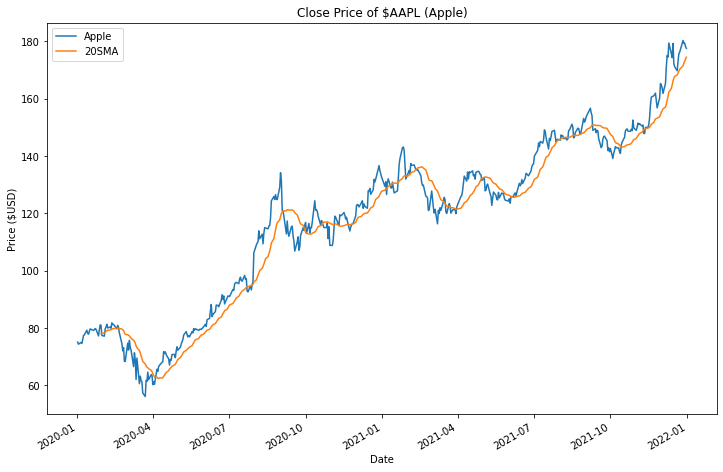

In [27]:
%matplotlib inline
import random
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf



start = "2020-01-02"
end = '2022-01-01'
aapl = yf.download('AAPL',start,end)
aapl['Close'].plot(label = 'Apple',figsize=(12,8))

aapl['20SMA'] = aapl['Close'].rolling(20).mean()
aapl['20SMA'].plot(label='20SMA')


plt.title('Close Price of $AAPL (Apple)')
plt.ylabel("Price ($USD)")
plt.legend()

## What is a simple moving average?
A simple moving average is a technical indicator often used to 'smoothen' a stock's movement. Each point on the moving average represents the `average` of a previous number $n$ of a stock's closing prices. This plot can then be used to analyze the general trend of a stock's performance over a period of time.

For example, let's say the stock **$ABC** closed at the prices $10,$20,$30,$40,and $50 over the last 5 trading days. The 5 day SMA would then be the average closing price of each of these 5 days, which is 
#### $\dfrac{10+20+30+40+50}{5} = \$30$

On day 6, the first day would be dropped, as the SMA now tracks only days 2,3,4,5, and 6. If the stock closes at $60, the 5 day SMA would then become 
#### $\dfrac{20+30+40+50+60}{5}= \$40$

In general, the SMA is equal to $$SMA_n = \dfrac{(P_1+P_2+...+P_n)}{n},$$ 
where $P$ is the closing price of a stock on each day of a period, and $n$ is the number of periods. Trust me, this equation is much less complex than it seems! In our examples above, we used an $n$ value of 5, meaning that we were calculating the $SMA_5$ of the stock, also known as the **5 SMA or 5 day Simple Moving Average**.  

 [Here's a great investopedia article with more info.](https://www.investopedia.com/terms/s/sma.asp)

### Let's model this process on a chart using `matplotlib` again and some custom values.

# Moving Average of Random Values
Here we are using a set of `days` numbered $1$ to $100$, and assigning a stock $XYZ a random price on each day. For simplicity's sake, let's just make the price on each day equal to a random value between 0 and 1. The `for` loops iterate through each day, averaging the previous 5 days' prices to create the 5 day SMA. 

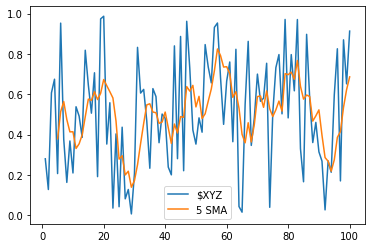

In [53]:
days = list(range(1, 101))
price = []            

for i in days:
    rand= random.random()
    price.append(rand)



plt.plot(days, price, label='$XYZ') #plot $XYZ
sma_5 = [None,None,None,None] # 5 SMA has no value on the first 4 days since there is not enough data.

for d in range(0,len(days)-4): #prevents out of bounds error from loop trying to add days after 100
    sum=0
    for p in range(d,d+5): 
        sum+=price[p] #add the prices for 5 days
    sma_5.append(sum/5.0) # add average to SMA function

plt.plot(days, sma_5, label='5 SMA') #plot 5 SMA
plt.legend()


As we can see, the SMA does a relatively good job of smoothing the data out, but in this case, the general trend is still quite random and unclear to follow. 
Here we need a different, more realistic method of representing a stock's movement. 

## Moving Average of Incremental Values
We'll keep the starting price of our stock constant at \$50 and add or subtract a random change in price each day. This change will be equal to a random decimal between (-1 and 1)  $*$ a multiplier. Let's call the multiplier `VOL` to represent the general **Volatility** we want our stock XYZ to have. Volatility represents how much a stock fluctuates in value, and can be influenced by a variety of external factors. More information (also from investopedia!) about volatility can be found [here.](https://www.investopedia.com/terms/v/volatility.asp)

Another note: 
Since this is an incremental function, it means the `price` of our stock may (and often does) go below zero if there is high `VOL`. In this example, I added an if-else statement that boosts the `price` if it is about to fall below zero. We want to keep the company afloat, after all! :) 

last value in price array:77.01091132861436
test price:77.01091132861433


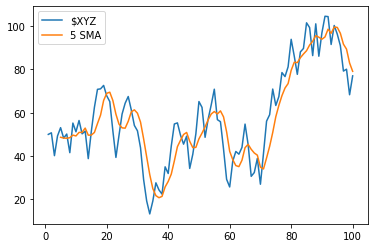

In [54]:
days = list(range(1, 101))
price = [50]
VOL = 15
test_price = 50
sum_R = 0

for i in range(1,100):
    rand = VOL*random.uniform(-1, 1)
    if(price[-1]+rand<=0): #if the price is going to become 0 or negative, add 5
        price.append(price[-1]+5)
        test_price+=5
    else:
        price.append(price[-1]+rand)
        sum_R+=(rand/VOL)##
    




plt.plot(days, price, label='$XYZ') #our stock!
sma_5 = [None,None,None,None]

for d in range(0,len(days)-4):
    sum=0
    for p in range(d,d+5):
        sum+=price[p]
    sma_5.append(sum/5.0)
plt.plot(days, sma_5, label='5 SMA')
plt.legend()

print("last value in price array:" + str(price[-1]))
test_price = test_price + (VOL*sum_R)
print("test price:" + str(test_price))


Looks a lot more realistic, right? It makes sense, as this model more accurately represents how a stock moves: rather than each day being a random value, the next day's value is instead based off the previous one. We also know this process in mathematics as a ***sequence*!** 

Using $VOL$ from before, let $R$ be a uniform random value on $[-1,1]$. We can then define our price P as 

$$P_d = \$50+ \sum_{d=1}^{days}VOL*R,$$       
$$or$$
$$P_d = \$50+ VOL*\sum_{d=1}^{days} R$$

This notation may be more difficult to understand than the above `for` loops, but they both represent the exact same idea. The price on any given day is just equal to the original price of $\$50$ + the cumulative changes in price, which is the sum of each $R*VOL$. Let's now move on to comparing SMA functions with different numbers of days.

## Comparing Moving Averages

We'll now define our SMA as a function, allowing us to more easily change the number of days we want to track.


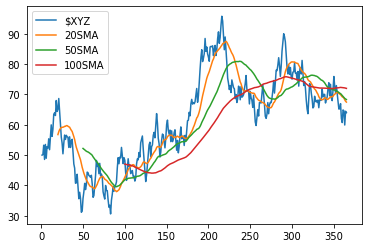

In [4]:
days = list(range(1, 366))
price = [50]
VOL = 5


for i in range(1,365):
    rand = VOL*random.uniform(-1, 1)
    if(price[-1]+rand<=0): #if the price is going to become 0 or negative, add 5
        price.append(price[-1]+5)
    else:
        price.append(price[-1]+rand)
        
plt.plot(days, price, label='$XYZ') #our stock!

def sma_n(n):  #function to find sma for a certain number of days n
    sma = [None] * (n-1)
    for d in range(0,len(days)-(n-1)):
        sum=0
        for p in range(d,d+n):
            sum+=price[p]
        sma.append(sum/n)
    plt.plot(days, sma, label=str(n)+'SMA')
    plt.legend()
    

sma_n(20)
sma_n(50)
sma_n(100)
